In [1]:
!pip install mne

In [2]:
%matplotlib notebook
import mne
import matplotlib
import matplotlib.pyplot as plt
import pathlib

In [3]:
matplotlib.use('Qt5Agg')

## Read in raw data; raw objects

In [4]:
sample_data_dir = mne.datasets.sample.data_path()

# Convert to a pathlib.Path for more convenience
sample_data_dir = pathlib.Path(sample_data_dir)
sample_data_dir

PosixPath('/home/jimk/mne_data/MNE-sample-data')

In [5]:
raw_path = sample_data_dir / 'MEG' / 'sample' / 'sample_audvis_raw.fif'
raw = mne.io.read_raw_fif(raw_path, preload=True)

Opening raw data file /home/jimk/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


#### Useful stuff

dir(raw)

raw.crop?

In [6]:
raw.filter(1,20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 1983 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 366 out of 366 | elapsed:    2.4s finished


<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~481.8 MB, data loaded>

In [7]:
# Pick only EEG channels and EOG
raw.pick_types(eeg=True, stim=True)#, eog=True)

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


<Raw | sample_audvis_raw.fif, 68 x 166800 (277.7 s), ~89.5 MB, data loaded>

In [8]:
raw.plot()

Using qt as 2D backend.


In [9]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

In [10]:
ica.fit(raw.copy().filter(8,35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 993 samples (1.653 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Fitting ICA to data using 59 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 16.4s.


Method,fastica
Fit,52 iterations on raw data (166800 samples)
ICA components,20
Available PCA components,59
Channel types,eeg
ICA components marked for exclusion,—


In [11]:
ica.plot_components()

[<MNEFigure size 975x967 with 20 Axes>]

In [12]:
# Store bad components in ica object
ica.exclude = [7, 14, 16, 17, 18, 19]

In [13]:
# or even use automatic algorithm
#bad_idx, scores = ica.find_bads_eog(raw, 'EOG 061', threshold=2)
#print(bad_idx)

In [14]:
# filtered data
ica.apply(raw.copy(), exclude=ica.exclude).plot()

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 59 PCA components


## Epochs

In [15]:
# find events based on stimulus channels
events = mne.find_events(raw)

320 events found
Event IDs: [ 1  2  3  4  5 32]


In [16]:
events #[time, xxx, ID]

array([[ 27977,      0,      2],
       [ 28345,      0,      3],
       [ 28771,      0,      1],
       [ 29219,      0,      4],
       [ 29652,      0,      2],
       [ 30025,      0,      3],
       [ 30450,      0,      1],
       [ 30839,      0,      4],
       [ 31240,      0,      2],
       [ 31665,      0,      3],
       [ 32101,      0,      1],
       [ 32519,      0,      4],
       [ 32935,      0,      2],
       [ 33325,      0,      3],
       [ 33712,      0,      1],
       [ 34089,      0,      5],
       [ 34532,      0,      2],
       [ 34649,      0,     32],
       [ 34956,      0,      3],
       [ 35428,      0,      1],
       [ 35850,      0,      4],
       [ 36211,      0,      2],
       [ 36576,      0,      3],
       [ 37007,      0,      1],
       [ 37460,      0,      4],
       [ 37910,      0,      2],
       [ 38326,      0,      3],
       [ 38711,      0,      1],
       [ 39130,      0,      4],
       [ 39563,      0,      2],
       [ 3

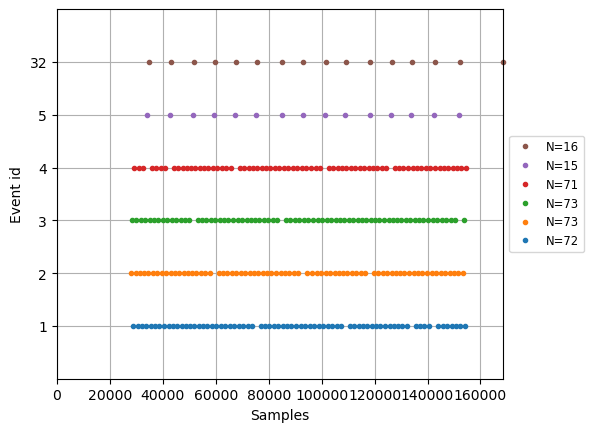

In [17]:
mne.viz.plot_events(events)

In [18]:
event_ids = {
    'Auditory/Left': 1,
    'Auditory/Right': 2,
    'Visual/Left': 3,
    'Visual/Right': 4,
    'Smiley': 5,
    'Button': 32
}

epochs = mne.Epochs(raw, events, event_id=event_ids)

Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [34]:
epochs.plot(events=events, event_id=event_ids)

You seem to have overlapping epochs. Some event lines may be duplicated in the plot.


Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Dropped 1 epoch: 56
The following epochs were marked as bad and are dropped:
[56]
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [20]:
epochs = mne.Epochs(raw, events, event_id=event_ids, preload=True)
epochs = ica.apply(epochs, exclude=ica.exclude)

Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 320 events and 421 original time points ...
0 bad epochs dropped
Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 59 PCA components


/tmp/ipykernel_7364/930629000.py:2: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs = ica.apply(epochs, exclude=ica.exclude)


In [21]:
epochs.apply_baseline((None, 0))

Applying baseline correction (mode: mean)


Number of events,320
Events,Auditory/Left: 72Auditory/Right: 73Button: 16Smiley: 15Visual/Left: 73Visual/Right: 71
Time range,-0.200 – 0.499 sec
Baseline,-0.200 – 0.000 sec


In [22]:
epochs['Auditory']

Number of events,145
Events,Auditory/Left: 72Auditory/Right: 73
Time range,-0.200 – 0.499 sec
Baseline,-0.200 – 0.000 sec


In [23]:
epochs.info

<Info | 19 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: STI 001, STI 002, STI 003, STI 004, STI 005, STI 006, STI 014, ...
 chs: 9 Stimulus, 59 EEG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 20.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 68
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: []
 sfreq: 600.6 Hz
>

In [24]:
epochs['Auditory'].plot_image(picks=[9])

Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 640x480 with 4 Axes>]

In [25]:
# equalize_event_counts()
# epochs.save()

In [26]:
epochs_for_tfr = mne.Epochs(raw, events, event_id=event_ids, tmin=-.5, tmax=1.5, preload=True)

Not setting metadata
320 matching events found
Setting baseline interval to [-0.49948803289596966, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 320 events and 1202 original time points ...
0 bad epochs dropped


In [37]:
epochs_for_tfr.plot(events=events, event_id=event_ids)

You seem to have overlapping epochs. Some event lines may be duplicated in the plot.


Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [36]:
epochs_for_tfr = ica.apply(epochs_for_tfr, exclude=ica.exclude)
#epochs_for_tfr.save("epochs_test1.fif")

Applying ICA to Epochs instance


/tmp/ipykernel_7364/1209085046.py:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs_for_tfr = ica.apply(epochs_for_tfr, exclude=ica.exclude)


    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 59 PCA components


In [42]:
# Get data out for np array for example
X = epochs.get_data()

print(type(X), X.shape) # shape: (events, channels, time_points)

<class 'numpy.ndarray'> (319, 68, 421)
